In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import plot_confusion_matrix,  classification_report
from sklearn.pipeline import Pipeline
from sklearn import svm
import seaborn as sns

In [3]:
df = pd.read_csv("./winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

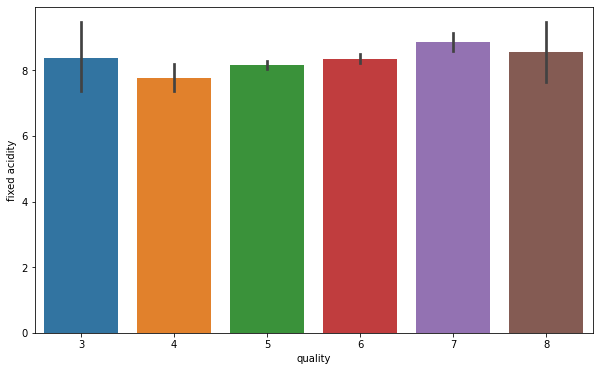

In [5]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

In [6]:
sorted(df.quality.unique())

[3, 4, 5, 6, 7, 8]

In [7]:
bins = (2,6.5,8)
lables = ['Bad', 'Good']
df1 = df
df1['quality'] = pd.cut(df1['quality'], bins=bins, labels=lables)
df1['quality']

0       Bad
1       Bad
2       Bad
3       Bad
4       Bad
       ... 
1594    Bad
1595    Bad
1596    Bad
1597    Bad
1598    Bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): ['Bad' < 'Good']

In [8]:
df1.quality.unique()
# df[df['quality'].isnull()]

['Bad', 'Good']
Categories (2, object): ['Bad' < 'Good']

In [9]:
lenc = LabelEncoder()
df1.quality = lenc.fit_transform(df1.quality)
df1.quality.unique()

array([0, 1])

0    1382
1     217
Name: quality, dtype: int64


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

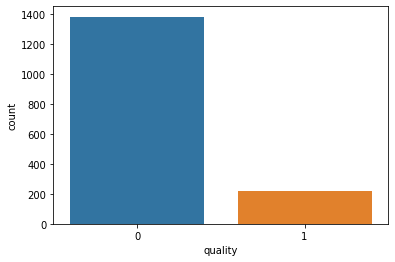

In [10]:
print(df1['quality'].value_counts())
sns.countplot(df1.quality)

In [11]:
X = df1.drop('quality', axis=1)
y = df1.quality

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>]],
      dtype=object)

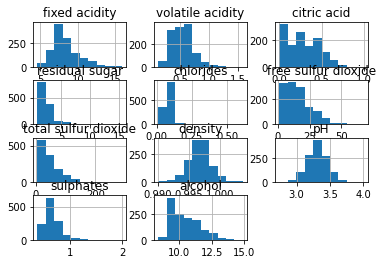

In [13]:
X_train.hist()

In [14]:
svc = svm.SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [15]:
svc.score(X_test, y_test)

0.85625

In [16]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       273
           1       1.00      0.02      0.04        47

    accuracy                           0.86       320
   macro avg       0.93      0.51      0.48       320
weighted avg       0.88      0.86      0.79       320



In [17]:
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])

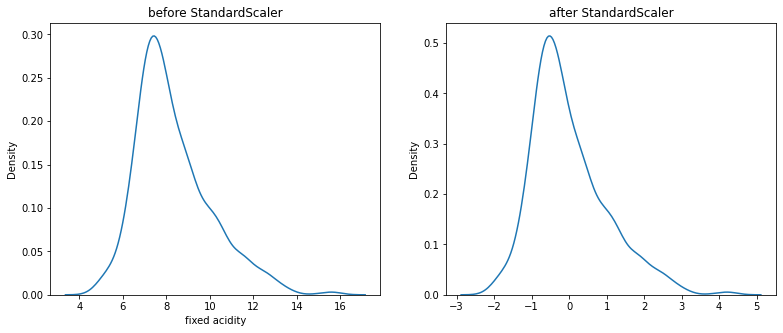

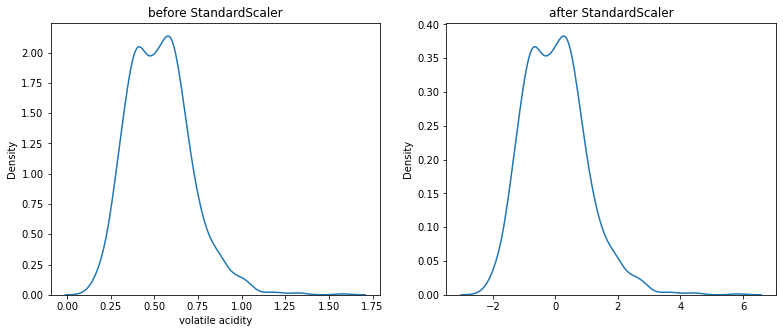

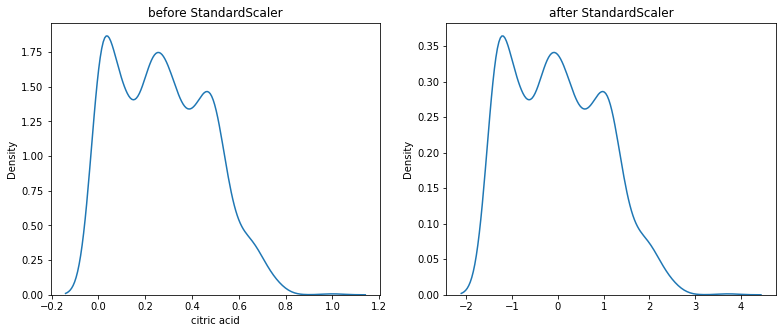

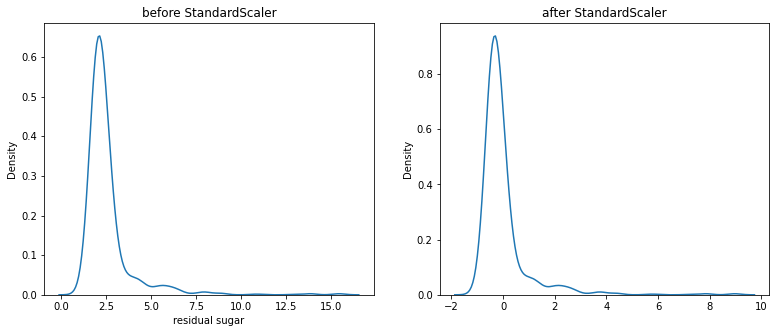

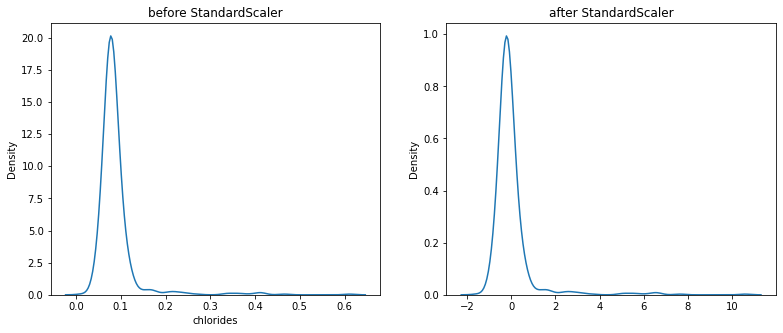

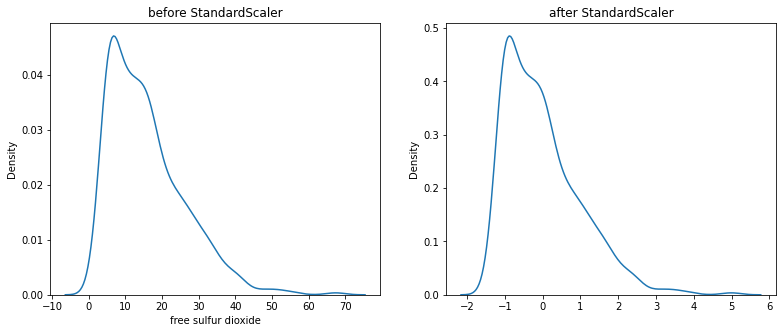

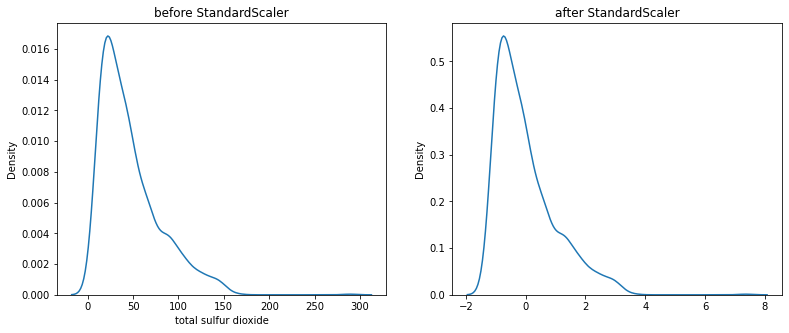

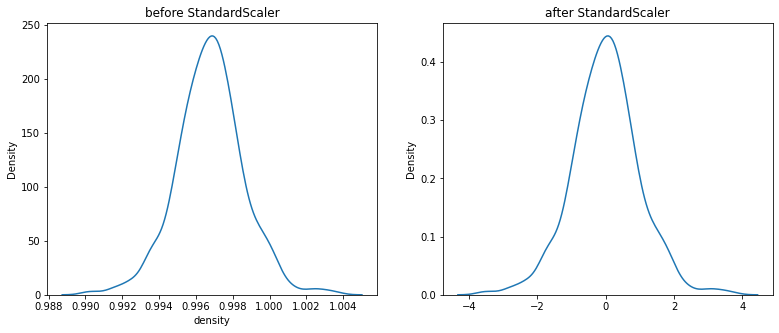

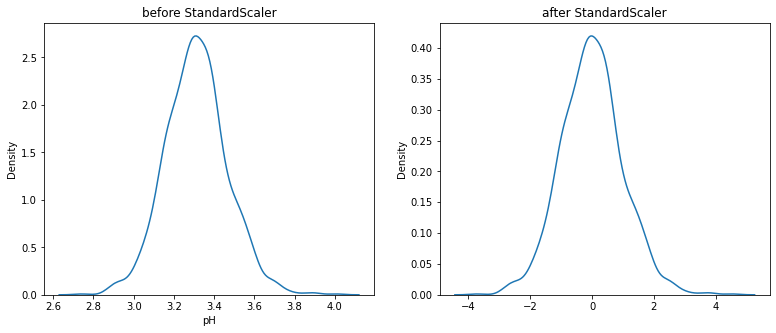

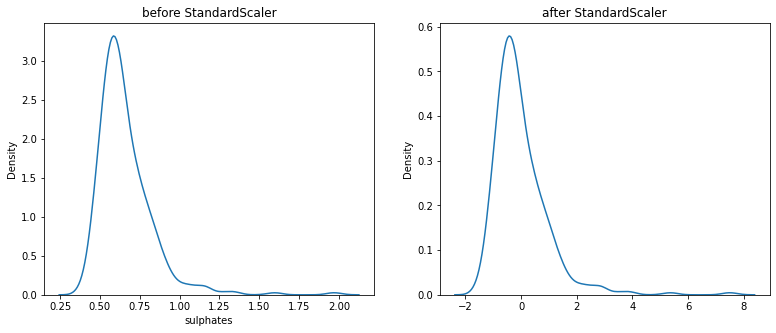

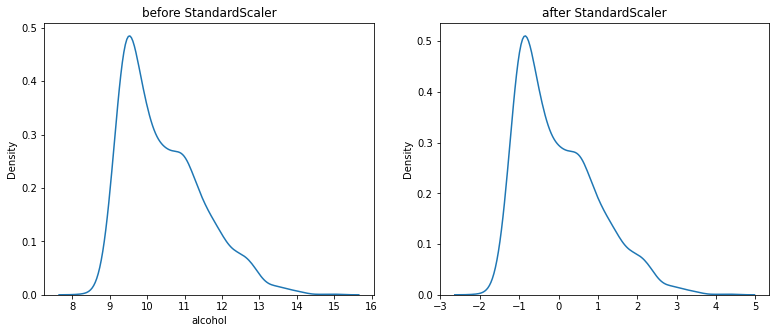

In [18]:
for col in X_train.columns:
    plots(X_train, col, StandardScaler())

In [19]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [20]:
def model_accuracy_scaled():
    model_scaled = Pipeline([
        ('scale', StandardScaler()),
        ('model', svc)
    ])
    model_scaled.fit(X_train, y_train)
    return model_scaled.score(X_test, y_test)

def model_accuracy_unscaled():
    model_unscaled = Pipeline([
        ('model', svc)
    ])
    model_unscaled.fit(X_train, y_train)
    return model_unscaled.score(X_test, y_test)

In [21]:
model_accuracy_scaled(), model_accuracy_unscaled()

(0.875, 0.85625)

## GridSearch CV Hyp-tuning

In [22]:
param = {
    "C":[0.0,0.1,0.3,0.5,0.7,0.9,1.5,10,100],
    "kernel":['linear', 'rbf'],
    "gamma":[0.0,0.1,0.3,0.5,0.7,0.9,1.5,10,100]
}
grd_scv = GridSearchCV(svc, param_grid=param, scoring='accuracy', verbose=100)

In [24]:
ssc = StandardScaler()
grd_scv.fit(ssc.fit_transform(X_train), y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] C=0.0, gamma=0.0, kernel=linear .................................
[CV] ....... C=0.0, gamma=0.0, kernel=linear, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] C=0.0, gamma=0.0, kernel=linear .................................
[CV] ....... C=0.0, gamma=0.0, kernel=linear, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] C=0.0, gamma=0.0, kernel=linear .................................
[CV] ....... C=0.0, gamma=0.0, kernel=linear, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[CV] C=0.0, gamma=0.0, kernel=linear .................................
[CV] ....... C=0.0, gamma=0.0, kernel=linear, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elap

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
c

[CV] ..... C=0.1, gamma=0.0, kernel=linear, score=0.867, total=   0.0s
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    0.1s remaining:    0.0s
[CV] C=0.1, gamma=0.0, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.0, kernel=rbf, score=0.867, total=   0.0s
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    0.1s remaining:    0.0s
[CV] C=0.1, gamma=0.0, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.0, kernel=rbf, score=0.867, total=   0.0s
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:    0.1s remaining:    0.0s
[CV] C=0.1, gamma=0.0, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.0, kernel=rbf, score=0.867, total=   0.0s
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:    0.1s remaining:    0.0s
[CV] C=0.1, gamma=0.0, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.0, kernel=rbf, score=0.867, total=   0.0s
[Parallel(n_jobs=1)]: Done  99 out of  99

[CV] ..... C=0.1, gamma=1.5, kernel=linear, score=0.867, total=   0.0s
[CV] C=0.1, gamma=1.5, kernel=linear .................................
[CV] ..... C=0.1, gamma=1.5, kernel=linear, score=0.867, total=   0.0s
[CV] C=0.1, gamma=1.5, kernel=linear .................................
[CV] ..... C=0.1, gamma=1.5, kernel=linear, score=0.867, total=   0.0s
[CV] C=0.1, gamma=1.5, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=1.5, kernel=rbf, score=0.867, total=   0.0s
[CV] C=0.1, gamma=1.5, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=1.5, kernel=rbf, score=0.867, total=   0.0s
[CV] C=0.1, gamma=1.5, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=1.5, kernel=rbf, score=0.867, total=   0.0s
[CV] C=0.1, gamma=1.5, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=1.5, kernel=rbf, score=0.867, total=   0.0s
[CV] C=0.1, gamma=1.5, kernel=rbf ....................................
[CV] .

[CV] ..... C=0.3, gamma=0.5, kernel=linear, score=0.867, total=   0.0s
[CV] C=0.3, gamma=0.5, kernel=linear .................................
[CV] ..... C=0.3, gamma=0.5, kernel=linear, score=0.867, total=   0.0s
[CV] C=0.3, gamma=0.5, kernel=rbf ....................................
[CV] ........ C=0.3, gamma=0.5, kernel=rbf, score=0.883, total=   0.0s
[CV] C=0.3, gamma=0.5, kernel=rbf ....................................
[CV] ........ C=0.3, gamma=0.5, kernel=rbf, score=0.883, total=   0.0s
[CV] C=0.3, gamma=0.5, kernel=rbf ....................................
[CV] ........ C=0.3, gamma=0.5, kernel=rbf, score=0.875, total=   0.0s
[CV] C=0.3, gamma=0.5, kernel=rbf ....................................
[CV] ........ C=0.3, gamma=0.5, kernel=rbf, score=0.883, total=   0.0s
[CV] C=0.3, gamma=0.5, kernel=rbf ....................................
[CV] ........ C=0.3, gamma=0.5, kernel=rbf, score=0.890, total=   0.0s
[CV] C=0.3, gamma=0.7, kernel=linear .................................
[CV] .

[CV] ..... C=0.5, gamma=0.1, kernel=linear, score=0.867, total=   0.0s
[CV] C=0.5, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.5, gamma=0.1, kernel=linear, score=0.863, total=   0.0s
[CV] C=0.5, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.5, gamma=0.1, kernel=linear, score=0.867, total=   0.0s
[CV] C=0.5, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.5, gamma=0.1, kernel=linear, score=0.867, total=   0.0s
[CV] C=0.5, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.5, gamma=0.1, kernel=rbf, score=0.887, total=   0.0s
[CV] C=0.5, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.5, gamma=0.1, kernel=rbf, score=0.895, total=   0.0s
[CV] C=0.5, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.5, gamma=0.1, kernel=rbf, score=0.871, total=   0.0s
[CV] C=0.5, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ...... C=0.5, gamma=10, kernel=linear, score=0.867, total=   0.0s
[CV] C=0.5, gamma=10, kernel=linear ..................................
[CV] ...... C=0.5, gamma=10, kernel=linear, score=0.867, total=   0.0s
[CV] C=0.5, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.5, gamma=10, kernel=rbf, score=0.867, total=   0.0s
[CV] C=0.5, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.5, gamma=10, kernel=rbf, score=0.867, total=   0.0s
[CV] C=0.5, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.5, gamma=10, kernel=rbf, score=0.867, total=   0.0s
[CV] C=0.5, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.5, gamma=10, kernel=rbf, score=0.867, total=   0.0s
[CV] C=0.5, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.5, gamma=10, kernel=rbf, score=0.867, total=   0.0s
[CV] C=0.5, gamma=100, kernel=linear .................................
[CV] .

[CV] ........ C=0.7, gamma=0.7, kernel=rbf, score=0.887, total=   0.0s
[CV] C=0.7, gamma=0.7, kernel=rbf ....................................
[CV] ........ C=0.7, gamma=0.7, kernel=rbf, score=0.871, total=   0.0s
[CV] C=0.7, gamma=0.7, kernel=rbf ....................................
[CV] ........ C=0.7, gamma=0.7, kernel=rbf, score=0.891, total=   0.0s
[CV] C=0.7, gamma=0.7, kernel=rbf ....................................
[CV] ........ C=0.7, gamma=0.7, kernel=rbf, score=0.894, total=   0.0s
[CV] C=0.7, gamma=0.9, kernel=linear .................................
[CV] ..... C=0.7, gamma=0.9, kernel=linear, score=0.867, total=   0.0s
[CV] C=0.7, gamma=0.9, kernel=linear .................................
[CV] ..... C=0.7, gamma=0.9, kernel=linear, score=0.867, total=   0.0s
[CV] C=0.7, gamma=0.9, kernel=linear .................................
[CV] ..... C=0.7, gamma=0.9, kernel=linear, score=0.863, total=   0.0s
[CV] C=0.7, gamma=0.9, kernel=linear .................................
[CV] .

[CV] ........ C=0.9, gamma=0.1, kernel=rbf, score=0.875, total=   0.0s
[CV] C=0.9, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.9, gamma=0.1, kernel=rbf, score=0.895, total=   0.0s
[CV] C=0.9, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.9, gamma=0.1, kernel=rbf, score=0.890, total=   0.0s
[CV] C=0.9, gamma=0.3, kernel=linear .................................
[CV] ..... C=0.9, gamma=0.3, kernel=linear, score=0.867, total=   0.0s
[CV] C=0.9, gamma=0.3, kernel=linear .................................
[CV] ..... C=0.9, gamma=0.3, kernel=linear, score=0.867, total=   0.0s
[CV] C=0.9, gamma=0.3, kernel=linear .................................
[CV] ..... C=0.9, gamma=0.3, kernel=linear, score=0.863, total=   0.0s
[CV] C=0.9, gamma=0.3, kernel=linear .................................
[CV] ..... C=0.9, gamma=0.3, kernel=linear, score=0.867, total=   0.0s
[CV] C=0.9, gamma=0.3, kernel=linear .................................
[CV] .

[CV] ......... C=0.9, gamma=10, kernel=rbf, score=0.883, total=   0.0s
[CV] C=0.9, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.9, gamma=10, kernel=rbf, score=0.906, total=   0.0s
[CV] C=0.9, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.9, gamma=10, kernel=rbf, score=0.894, total=   0.0s
[CV] C=0.9, gamma=100, kernel=linear .................................
[CV] ..... C=0.9, gamma=100, kernel=linear, score=0.867, total=   0.0s
[CV] C=0.9, gamma=100, kernel=linear .................................
[CV] ..... C=0.9, gamma=100, kernel=linear, score=0.867, total=   0.0s
[CV] C=0.9, gamma=100, kernel=linear .................................
[CV] ..... C=0.9, gamma=100, kernel=linear, score=0.863, total=   0.0s
[CV] C=0.9, gamma=100, kernel=linear .................................
[CV] ..... C=0.9, gamma=100, kernel=linear, score=0.867, total=   0.0s
[CV] C=0.9, gamma=100, kernel=linear .................................
[CV] .

[CV] ........ C=1.5, gamma=0.7, kernel=rbf, score=0.859, total=   0.0s
[CV] C=1.5, gamma=0.7, kernel=rbf ....................................
[CV] ........ C=1.5, gamma=0.7, kernel=rbf, score=0.922, total=   0.0s
[CV] C=1.5, gamma=0.7, kernel=rbf ....................................
[CV] ........ C=1.5, gamma=0.7, kernel=rbf, score=0.895, total=   0.0s
[CV] C=1.5, gamma=0.7, kernel=rbf ....................................
[CV] ........ C=1.5, gamma=0.7, kernel=rbf, score=0.918, total=   0.0s
[CV] C=1.5, gamma=0.7, kernel=rbf ....................................
[CV] ........ C=1.5, gamma=0.7, kernel=rbf, score=0.918, total=   0.0s
[CV] C=1.5, gamma=0.9, kernel=linear .................................
[CV] ..... C=1.5, gamma=0.9, kernel=linear, score=0.867, total=   0.0s
[CV] C=1.5, gamma=0.9, kernel=linear .................................
[CV] ..... C=1.5, gamma=0.9, kernel=linear, score=0.867, total=   0.0s
[CV] C=1.5, gamma=0.9, kernel=linear .................................
[CV] .

[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.914, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.883, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.887, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.886, total=   0.0s
[CV] C=10, gamma=0.3, kernel=linear ..................................
[CV] ...... C=10, gamma=0.3, kernel=linear, score=0.867, total=   0.0s
[CV] C=10, gamma=0.3, kernel=linear ..................................
[CV] ...... C=10, gamma=0.3, kernel=linear, score=0.867, total=   0.0s
[CV] C=10, gamma=0.3, kernel=linear ..................................
[CV] ...... C=10, gamma=0.3, kernel=linear, score=0.855, total=   0.1s
[CV] C=10, gamma=0.3, kernel=linear ..................................
[CV] .

[CV] ....... C=10, gamma=10, kernel=linear, score=0.867, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .......... C=10, gamma=10, kernel=rbf, score=0.891, total=   0.1s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .......... C=10, gamma=10, kernel=rbf, score=0.902, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .......... C=10, gamma=10, kernel=rbf, score=0.883, total=   0.1s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .......... C=10, gamma=10, kernel=rbf, score=0.906, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .......... C=10, gamma=10, kernel=rbf, score=0.894, total=   0.0s
[CV] C=10, gamma=100, kernel=linear ..................................
[CV] ...... C=10, gamma=100, kernel=linear, score=0.867, total=   0.0s
[CV] C=10, gamma=100, kernel=linear ..................................
[CV] .

[CV] ..... C=100, gamma=0.7, kernel=linear, score=0.855, total=   0.6s
[CV] C=100, gamma=0.7, kernel=linear .................................
[CV] ..... C=100, gamma=0.7, kernel=linear, score=0.867, total=  21.9s
[CV] C=100, gamma=0.7, kernel=linear .................................
[CV] ..... C=100, gamma=0.7, kernel=linear, score=0.867, total=  10.0s
[CV] C=100, gamma=0.7, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.7, kernel=rbf, score=0.855, total=   0.0s
[CV] C=100, gamma=0.7, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.7, kernel=rbf, score=0.918, total=   0.0s
[CV] C=100, gamma=0.7, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.7, kernel=rbf, score=0.891, total=   0.0s
[CV] C=100, gamma=0.7, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.7, kernel=rbf, score=0.895, total=   0.0s
[CV] C=100, gamma=0.7, kernel=rbf ....................................
[CV] .

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.5, 10, 100],
                         'gamma': [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.5, 10, 100],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=100)

In [25]:
grd_scv.best_params_

{'C': 1.5, 'gamma': 0.7, 'kernel': 'rbf'}

In [32]:
grd_scv.best_score_, grd_scv.best_index_, grd_scv.best_estimator_

(0.9022794117647059, 117, SVC(C=1.5, gamma=0.7))

In [48]:
dww =grd_scv.cv_results_
sorted(dww['mean_test_score'])

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.8647395833333335,
 0.8647395833333335,
 0.8647395833333335,
 0.8647395833333335,
 0.8647395833333335,
 0.8647395833333335,
 0.8647395833333335,
 0.8647395833333335,
 0.8647395833333335,
 0.8647395833333335,
 0.8647395833333335,
 0.8647395833333335,
 0.8647395833333335,
 0.8647395833333335,
 0.8647395833333335,
 0.8647395833333335,
 0.8647395833333335,
 0.8647395833333335,
 0.8647395833333335,
 0.8647395833333335,
 0.8647395833333335,
 0.8647395833333335,
 0.8647395833333335,
 0.8647395833333335,
 0.8647395833333335,
 0.8647395833333335,
 0.8647395833333335,
 0.8663020833333335,
 0.8663020833333335,
 0.8663020833333335,
 0.8663020833333335,
 0.8663020833333335,
 0.8663020833333335,
 0.8663020833333335,
 0.8663020833333335,
 0.8663020833333335,
 0.8663020833333335,
 0.8663020833333335,
 0.8663020833333335,
 0.8663020833333335,
 0.8663020833333335,
 0.8663020833333335,
 0.8663020

In [51]:
svc = svm.SVC(C=1.5, gamma=0.7,kernel ='rbf')

In [52]:
svc.fit(ssc.fit_transform(X_train), y_train)

SVC(C=1.5, gamma=0.7)

In [54]:
svc.score(X_test,y_test)

0.853125

In [57]:
grd_scv.predict(X_test47)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [60]:
svc2 = svm.SVC(C = 1.5, gamma =  0.7, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)

In [61]:
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       273
           1       1.00      0.30      0.46        47

    accuracy                           0.90       320
   macro avg       0.95      0.65      0.70       320
weighted avg       0.91      0.90      0.87       320

